In [30]:
import numpy as np
import matrix_completion as mc
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Figure 2

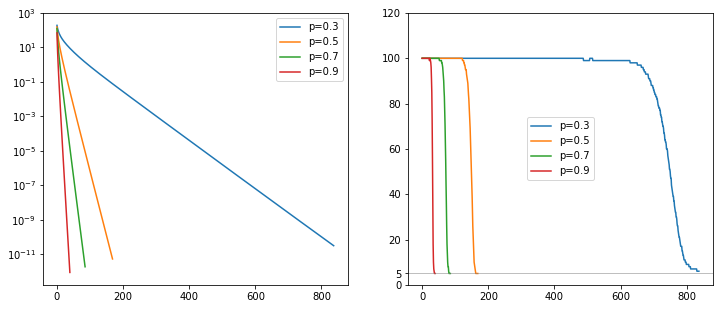

In [34]:
r = 5
n_1 = 100
n_2 = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

N = dict()
R = dict()

for p in [0.3, 0.5, 0.7, 0.9]:
    mask = np.random.rand(n_1, n_2) < p
    M = (np.random.randn(n_1, r))@(np.random.randn(r, n_2))
    X, X_list = mc.ap(M*mask, mask, r, epsilon=1e-12, max_iter=10000)
    
    N[p] = [np.linalg.norm(X - M) for X in X_list]
    R[p] = [np.linalg.matrix_rank(X) for X in X_list]
    
for p in N:
    ax1.semilogy(N[p], label=f'p={p}')
    ax2.plot(R[p], label=f'p={p}')

ax1.legend()
ax2.legend()

ynew = 5
ax2.axhline(ynew, color='gray', linewidth=0.5)

yt = ax2.get_yticks()
yt=np.append(yt,ynew)

ax2.set_yticks(yt)
ax2.set_yticklabels(yt.astype(int))

plt.show()

# Figure 3

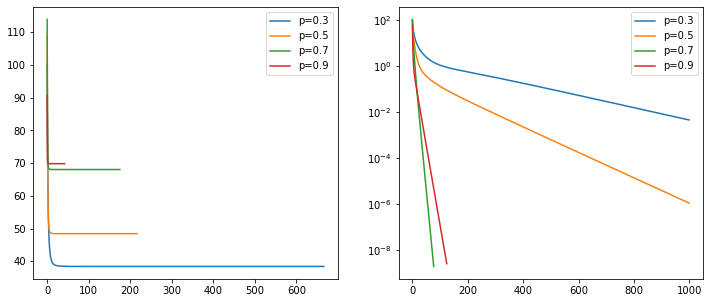

In [35]:
r = 5
n_1 = 100
n_2 = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for p in [0.3, 0.5, 0.7, 0.9]:
    mask = np.random.rand(n_1, n_2) < p
    M = (np.random.randn(n_1, r))@(np.random.randn(r, n_2))
    X, X_list1 = mc.ap(M*mask, mask, r-1, logging='XY')
    ax1.plot([np.linalg.norm(X_list1[i] - X_list1[j]) for i, j in zip(range(0, len(X_list1), 2), range(1, len(X_list1), 2))], label=f'p={p}')
    
for p in [0.3, 0.5, 0.7, 0.9]:
    mask = np.random.rand(n_1, n_2) < p
    M = (np.random.randn(n_1, r))@(np.random.randn(r, n_2))    
    X, X_list2 = mc.ap(M*mask, mask, r+1, logging='XY')
    ax2.semilogy([np.linalg.norm(X_list2[i] - X_list2[j]) for i, j in zip(range(0, len(X_list2), 2), range(1, len(X_list2), 2))], label=f'p={p}')
    
ax1.legend()
ax2.legend()
plt.show()

# Figure 4

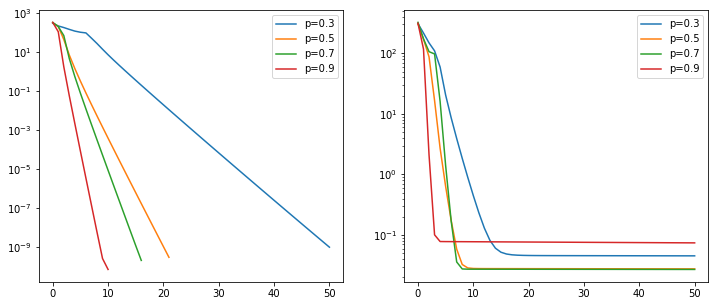

In [36]:
r = 5
n_1 = 100
n_2 = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

N = dict()
R = dict()

for p in [0.3, 0.5, 0.7, 0.9]:
    mask = np.random.rand(n_1, n_2) < p
    M = (np.random.randn(n_1, r))@(np.random.randn(r, n_2))
    X, X_list = mc.als(M*mask, mask, r, 1e-12)
    
    N[p] = [np.linalg.norm(X - M) for X in X_list]
    
for p in [0.3, 0.5, 0.7, 0.9]:
    mask = np.random.rand(n_1, n_2) < p
    M = (np.random.randn(n_1, r))@(np.random.randn(r, n_2))
    X, X_list = mc.als(M*mask, mask, r, 1e-3, max_iter=50)
    
    R[p] = [np.linalg.norm(X - M) for X in X_list]
    
for p in N:
    ax1.semilogy(N[p], label=f'p={p}')
    ax2.semilogy(R[p], label=f'p={p}')

ax1.legend()
ax2.legend()

plt.show()

# Figure 5

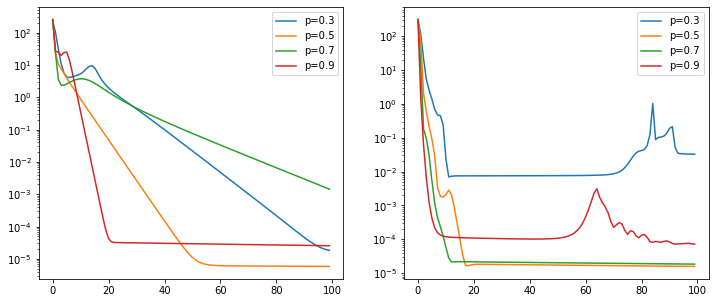

In [37]:
r = 5
n_1 = 100
n_2 = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for p in [0.3, 0.5, 0.7, 0.9]:
    mask = np.random.rand(n_1, n_2) < p
    M = (np.random.randn(n_1, r))@(np.random.randn(r, n_2))
    X, X_list1 = mc.als(M*mask, mask, r-1, 1e-3, epsilon=1e-6, max_iter=200)
    ax1.semilogy([np.linalg.norm(X_list1[i] - X_list1[j]) for i, j in zip(range(0, len(X_list1), 2), range(1, len(X_list1), 2))], label=f'p={p}')
    
for p in [0.3, 0.5, 0.7, 0.9]:
    mask = np.random.rand(n_1, n_2) < p
    M = (np.random.randn(n_1, r))@(np.random.randn(r, n_2))    
    X, X_list2 = mc.als(M*mask, mask, r+1, 1e-3, epsilon=1e-6, max_iter=200)
    ax2.semilogy([np.linalg.norm(X_list2[i] - X_list2[j]) for i, j in zip(range(0, len(X_list2), 2), range(1, len(X_list2), 2))], label=f'p={p}')
    
ax1.legend()
ax2.legend()
plt.show()

# Figure 7

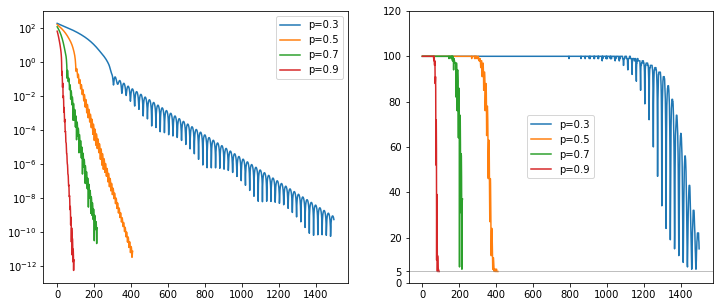

In [38]:
r = 5
n_1 = 100
n_2 = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

N = dict()
R = dict()

for p in [0.3, 0.5, 0.7, 0.9]:
    mask = np.random.rand(n_1, n_2) < p
    M = (np.random.randn(n_1, r))@(np.random.randn(r, n_2))
    X, X_list = mc.nnm(M*mask, mask, 1, 1, epsilon=1e-12, max_iter=1500)
    
    N[p] = [np.linalg.norm(X - M) for X in X_list]
    R[p] = [np.linalg.matrix_rank(X) for X in X_list]
    
for p in N:
    ax1.semilogy(N[p], label=f'p={p}')
    ax2.plot(R[p], label=f'p={p}')

ax1.legend()
ax2.legend()

ynew = 5
ax2.axhline(ynew, color='gray', linewidth=0.5)

yt = ax2.get_yticks()
yt=np.append(yt,ynew)

ax2.set_yticks(yt)
ax2.set_yticklabels(yt.astype(int))

plt.show()

# Figure 8

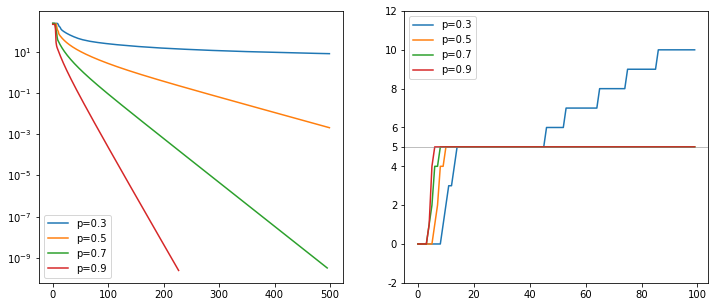

In [39]:
r = 5
n_1 = 100
n_2 = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

N = dict()
R = dict()

for p in [0.3, 0.5, 0.7, 0.9]:
    mask = np.random.rand(n_1, n_2) < p
    M = (np.random.randn(n_1, r))@(np.random.randn(r, n_2))
    X, X_list = mc.svt(M*mask, mask, 5*n_1, 1.2/0.9, epsilon=1e-12, max_iter=500)
    
    N[p] = [np.linalg.norm(X - M) for X in X_list]
    R[p] = [np.linalg.matrix_rank(X) for X in X_list]
    
for p in N:
    ax1.semilogy(N[p], label=f'p={p}')
    ax2.plot(R[p][:100], label=f'p={p}')

ax1.legend()
ax2.legend()

ynew = 5
ax2.axhline(ynew, color='gray', linewidth=0.5)

yt = ax2.get_yticks()
yt=np.append(yt,ynew)

ax2.set_yticks(yt)
ax2.set_yticklabels(yt.astype(int))

plt.show()

# Figure 10

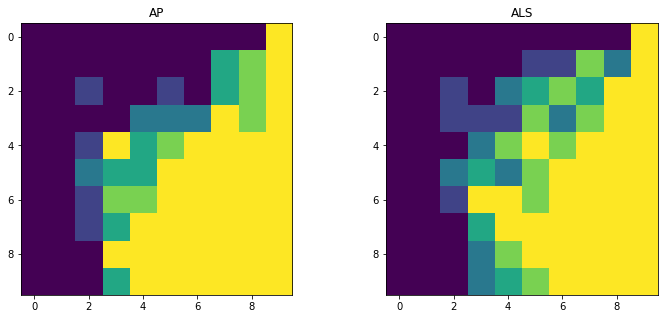

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

n = 20

n_tests = 5
x_res = 10
y_res = 10

ps = np.linspace(0, 1, y_res)
xs = np.flip(np.linspace(0, 1, x_res))

heatmap = np.zeros((x_res, y_res))
heatmap2 = np.zeros((x_res, y_res))
for i in range(x_res):
    for j in range(y_res):
        succ = 0
        succ2 = 0
        r = int(n*(1-np.sqrt(1-ps[j]*xs[i])))
        if r == 0:
            r = 1
        elif r == n:
            r = r-1
        for _ in range(n_tests):
            mask = np.random.rand(n, n) < ps[j]
            M = (np.random.randn(n, r))@(np.random.randn(r, n))
            X, X_list = mc.ap(M*mask, mask, r, max_iter=500)
            if np.linalg.norm(M-X, 'fro') < 10**-2:
                succ += 1

            mask = np.random.rand(n, n) < ps[j]
            M = (np.random.randn(n, r))@(np.random.randn(r, n))
            X, X_list = mc.als(M*mask, mask, r, 1e-9, max_iter=500)
            if np.linalg.norm(M-X, 'fro') < 10**-2:
                succ2 += 1    
        heatmap[i, j] = succ/n_tests
        heatmap2[i, j] = succ2/n_tests
        
ax1.imshow(heatmap)
ax1.set_title('AP')
ax2.imshow(heatmap2)
ax2.set_title('ALS')
plt.show()

# Figure 11

/home/maximilian.seeber/workspace/matrix-completion-code/matrix_completion.py:111: RuntimeWarning: invalid value encountered in double_scalars
  Y = Y + delta*(mask*(M-X))


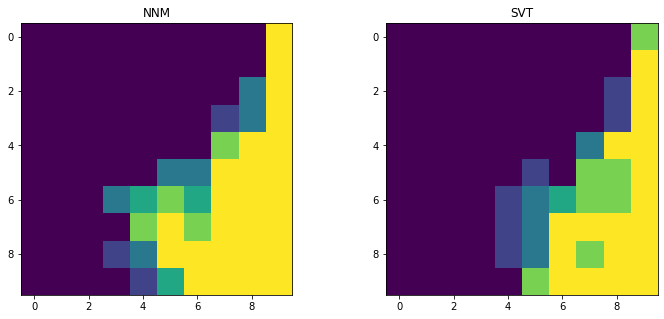

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

n = 20

n_tests = 5
x_res = 10
y_res = 10

ps = np.linspace(0, 1, y_res)
xs = np.flip(np.linspace(0, 1, x_res))

heatmap = np.zeros((x_res, y_res))
heatmap2 = np.zeros((x_res, y_res))
for i in range(x_res):
    for j in range(y_res):
        succ = 0
        succ2 = 0
        r = int(n*(1-np.sqrt(1-ps[j]*xs[i])))
        if r == 0:
            r = 1
        elif r == n:
            r = r-1
        for _ in range(n_tests):
            mask = np.random.rand(n, n) < ps[j]
            M = (np.random.randn(n, r))@(np.random.randn(r, n))
            X, X_list = mc.nnm(M*mask, mask, 1, 1, max_iter=500)
            if np.linalg.norm(M-X, 'fro') < 10**-2:
                succ += 1

            mask = np.random.rand(n, n) < ps[j]
            M = (np.random.randn(n, r))@(np.random.randn(r, n))
            X, X_list = mc.svt(M*mask, mask, 5*n, 1.2/0.9, epsilon=1e-6, max_iter=1000)
            if np.linalg.norm(M-X, 'fro') < 10**-2:
                succ2 += 1    
        heatmap[i, j] = succ/n_tests
        heatmap2[i, j] = succ2/n_tests
        
ax1.imshow(heatmap)
ax1.set_title('NNM')
ax2.imshow(heatmap2)
ax2.set_title('SVT')
plt.show()